# Generate Atom-mapped SMILES for RMG reactions.
This notebook helps create atom-mapped SMILES for reactants and products that belong to a RMG reaction family.

In [1]:
import os
import sys
# To add this RDMC into PYTHONPATH in case you haven't do it
sys.path.append(os.path.dirname(os.path.abspath('')))

from rdmc.mol import RDKitMol, parse_xyz_or_smiles_list

try:
    # import RMG dependencies
    from rdmc.external.rmg import (from_rdkit_mol,
                                   load_rmg_database,
                                   generate_reaction_complex,)
    # Load RMG database
    database = load_rmg_database(families='all')
except (ImportError, ModuleNotFoundError):
    print('You need to install RMG-Py first and run this IPYNB in rmg_env!')

%load_ext autoreload
%autoreload 2

RDKit WARNING: [12:37:39] WARNING: not removing hydrogen atom without neighbors


## Examples
For carbenes and biradicals, you need to specify the multiplicity as well. E.g., `reactants=[('[CH2]', 1)]`

H_migration

In [2]:
reactants = [
"""[CH2]CCCCO""",]
products = [
"""CCCCC[O]""",]

Retroene

In [3]:
reactants = [
""" C1=CC(C2C=CCC2)C=C1""",]

products = [
"""C1=CC=CC1""",
"""C1=CC=CC1""",]

H abstraction

In [4]:
reactants = [
"""[O]""",
"""CCCCO""",]

products = [
"""[OH]""",
"""[CH2]CCCO""",]

1+2_Cycloaddition

In [5]:
reactants = [
("""[O]""", 1),
"""C=C""",]

products = [
"""C1OC1""",]

1,2_Insertion_carbene

In [6]:
reactants = [
    ("""[CH2]""", 1),
    """C=C""", ]

products = [
    """CC=C""", ]


## Generate reactant and product complex

In [7]:
try:
    # Generate RMG Molecule
    r_mols = parse_xyz_or_smiles_list(reactants)
    p_mols = parse_xyz_or_smiles_list(products)
    reactant_molecules = [from_rdkit_mol(r) for r in r_mols]
    product_molecules = [from_rdkit_mol(p) for p in p_mols]

except Exception as e:
    print(e)
    print('Have issues generating molecules.')
else:
    # A product complex with the same atom indexing as the reactant is generated
    reactant_complex, product_complex = generate_reaction_complex(
                                            database,
                                            reactant_molecules,
                                            product_molecules,
                                            verbose=True)

if reactant_complex:
    r_complex = RDKitMol.FromRMGMol(reactant_complex)
    p_complex = RDKitMol.FromRMGMol(product_complex)

Cannot match the multiplicity by saturating 1,2 biradical.
Cannot match the multiplicity by saturating biradical with conjugated double bonds.
Eventually, SaturateMol finds a way to saturate the molecule to the desired multiplicity.
C=C + [CH2] <=> C=CC
RMG family: 1,2_Insertion_carbene
Is forward reaction: True


### Generate SMILES

Reactant

In [8]:
r_complex.ToSmiles(RemoveAtomMap=False, removeHs=False).split('.')

['[C:3](=[C:4]([H:7])[H:8])([H:5])[H:6]', '[CH2:0]([H:1])[H:2]']

Product

In [9]:
p_complex.ToSmiles(RemoveAtomMap=False, removeHs=False).split('.')

['[C:0]([H:1])([H:2])([C:3](=[C:4]([H:7])[H:8])[H:6])[H:5]']

Double check by Molecule graph

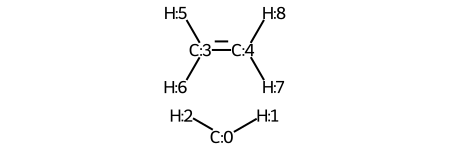

In [10]:
r_complex

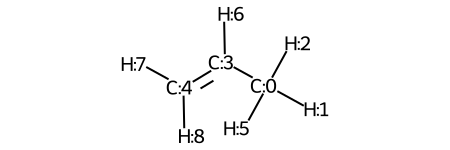

In [11]:
p_complex